In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

In [2]:
def split_image(image):
    # image = cv2.imread(image_path, 0)
    a = image[:, :image.shape[0]]
    b = image[:, image.shape[0]:]
    return a, b

In [3]:
def get_transform():
    # 定義變換管道
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
        transforms.Lambda(lambda x: x.unsqueeze(0))
    ])
    return transform

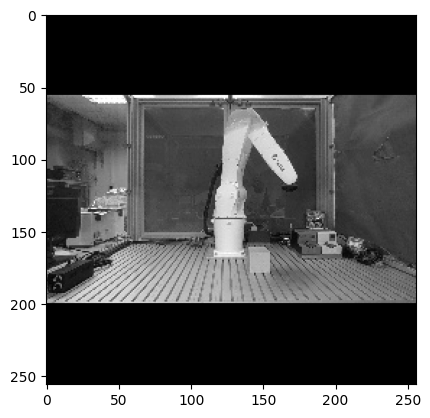

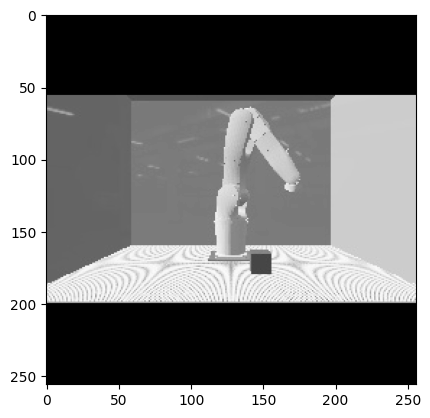

In [4]:
image_path = "/home/yen/mount/nas/111/111033631_Yen/ARM/GAN_images/all/test/img_0804.jpg"

image = cv2.imread(image_path, 0)

a, b = split_image(image)
plt.imshow(a, cmap='gray')
plt.show()
plt.imshow(b, cmap='gray')
plt.show()

In [5]:
# 應用變換
transform = get_transform()
a_tensor = transform(a)

# 打印最終的 Tensor
# print(a_tensor)
# a_tensor = a_tensor.unsqueeze(0)
a_tensor[0, 0, 56, :10]

tensor([-0.1765, -0.1843, -0.0902, -0.0118, -0.0980, -0.0510, -0.0588, -0.0667,
        -0.0667, -0.0039])

In [44]:
import torch

# 創建兩個相同的 Tensor
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([1, 2, 3])

# 創建一個不同的 Tensor
tensor_c = torch.tensor([1, 2, 4])

# 使用 torch.equal() 比較
print(torch.equal(tensor_a, tensor_b))  # 應該輸出 True
print(torch.equal(tensor_a, tensor_c))  # 應該輸出 False


True
False


In [45]:
import torch

# 創建兩個 Tensor
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([1, 2, 3])
tensor_c = torch.tensor([1, 2, 4])

# 使用 torch.eq() 比較元素
result_ab = torch.eq(tensor_a, tensor_b)
result_ac = torch.eq(tensor_a, tensor_c)

print(result_ab)  # 應該輸出 tensor([ True,  True,  True])
print(result_ac)  # 應該輸出 tensor([ True,  True, False])


tensor([True, True, True])
tensor([ True,  True, False])


In [41]:
tensor_a

tensor([1, 2, 3, 4, 5])

In [11]:
import torch

# 創建兩個浮點數 Tensor
tensor_d = torch.tensor([1.0, 2.0, 3.000001])
tensor_e = torch.tensor([1.0, 2.0, 3.0])

# 使用 torch.allclose() 比較
print(torch.allclose(tensor_d, tensor_e))  # 根據容差，應該輸出 True


True


In [12]:
import torch

# 創建兩個 Tensor
tensor_a = torch.tensor([1, 2, 3, 4, 5])
tensor_b = torch.tensor([1, 2, 0, 4, 6])

# 使用 torch.eq() 比較元素
comparison_result = torch.eq(tensor_a, tensor_b)

# 找到等於 False 的位置
false_positions = torch.nonzero(~comparison_result)

# 計算 False 的數量
num_false = (~comparison_result).sum()

print("比較結果:")
print(comparison_result)

print("\n等於 False 的位置:")
print(false_positions)

print("\nFalse 的數量:")
print(num_false)


比較結果:
tensor([ True,  True, False,  True, False])

等於 False 的位置:
tensor([[2],
        [4]])

False 的數量:
tensor(2)


---
PIL CV2

(256, 512)


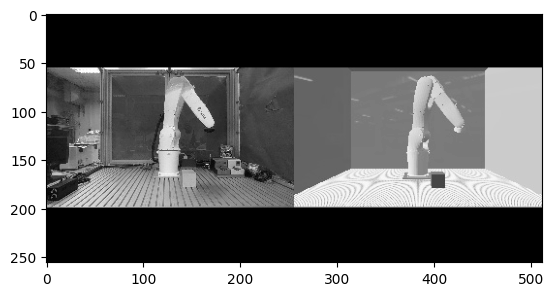

In [33]:
from PIL import Image

image_path = "/home/yen/mount/nas/111/111033631_Yen/ARM/GAN_images/all/test/img_0804.jpg"
# 讀取圖像
image_pil = Image.open(image_path).convert('L')
image_pil


image = cv2.imread(image_path, 0)
plt.imshow(image, cmap="gray")
print(image.shape)


(256, 512)


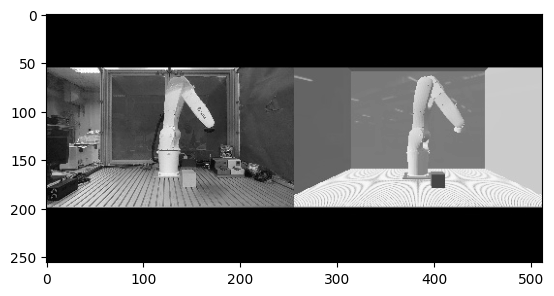

In [34]:
image_pil_ar = np.asarray(image_pil)
image_pil_ar
plt.imshow(image_pil_ar, cmap='gray')
print(image_pil_ar.shape)

In [32]:
np.array_equal(image_pil_ar, image)

False

In [37]:
def read_from_PIL(image_path):
    AB = Image.open(image_path).convert('RGB')
    # # split AB image into A and B
    w, h = AB.size
    w2 = int(w / 2)
    A = AB.crop((0, 0, w2, h))
    B = AB.crop((w2, 0, w, h))
    return A, B

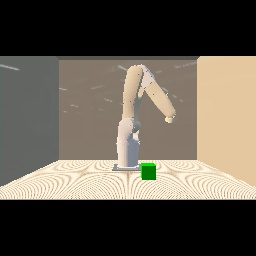

In [40]:
import numpy as np

A, B =read_from_PIL(image_path)
B

In [35]:
tr = get_transform()
tr(AB)

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]])